# 排序算法

In [64]:
class LinkNode:
    
    def __init__(self, data,):
        
        
        self.data = data
        self.next = None

class LinkList:
    
    def __init__(self,):
        
        self.head = None
    
    def add_node(self, link_node):
        
        if not self.head:
            self.head = link_node
        else:
            
            tmp = self.head
            while tmp.next:
                tmp = tmp.next
            tmp.next = link_node
    
def show(head,):

    link_list = []
    tmp = head
    while tmp:
        link_list.append(tmp.data)
        tmp = tmp.next
    print "->".join([ str(link) for link in link_list])
            

def swap(node1, node2):
    """
    swap the value of node1 and node2.
    
    """
    
    node1.data, node2.data = node2.data, node1.data


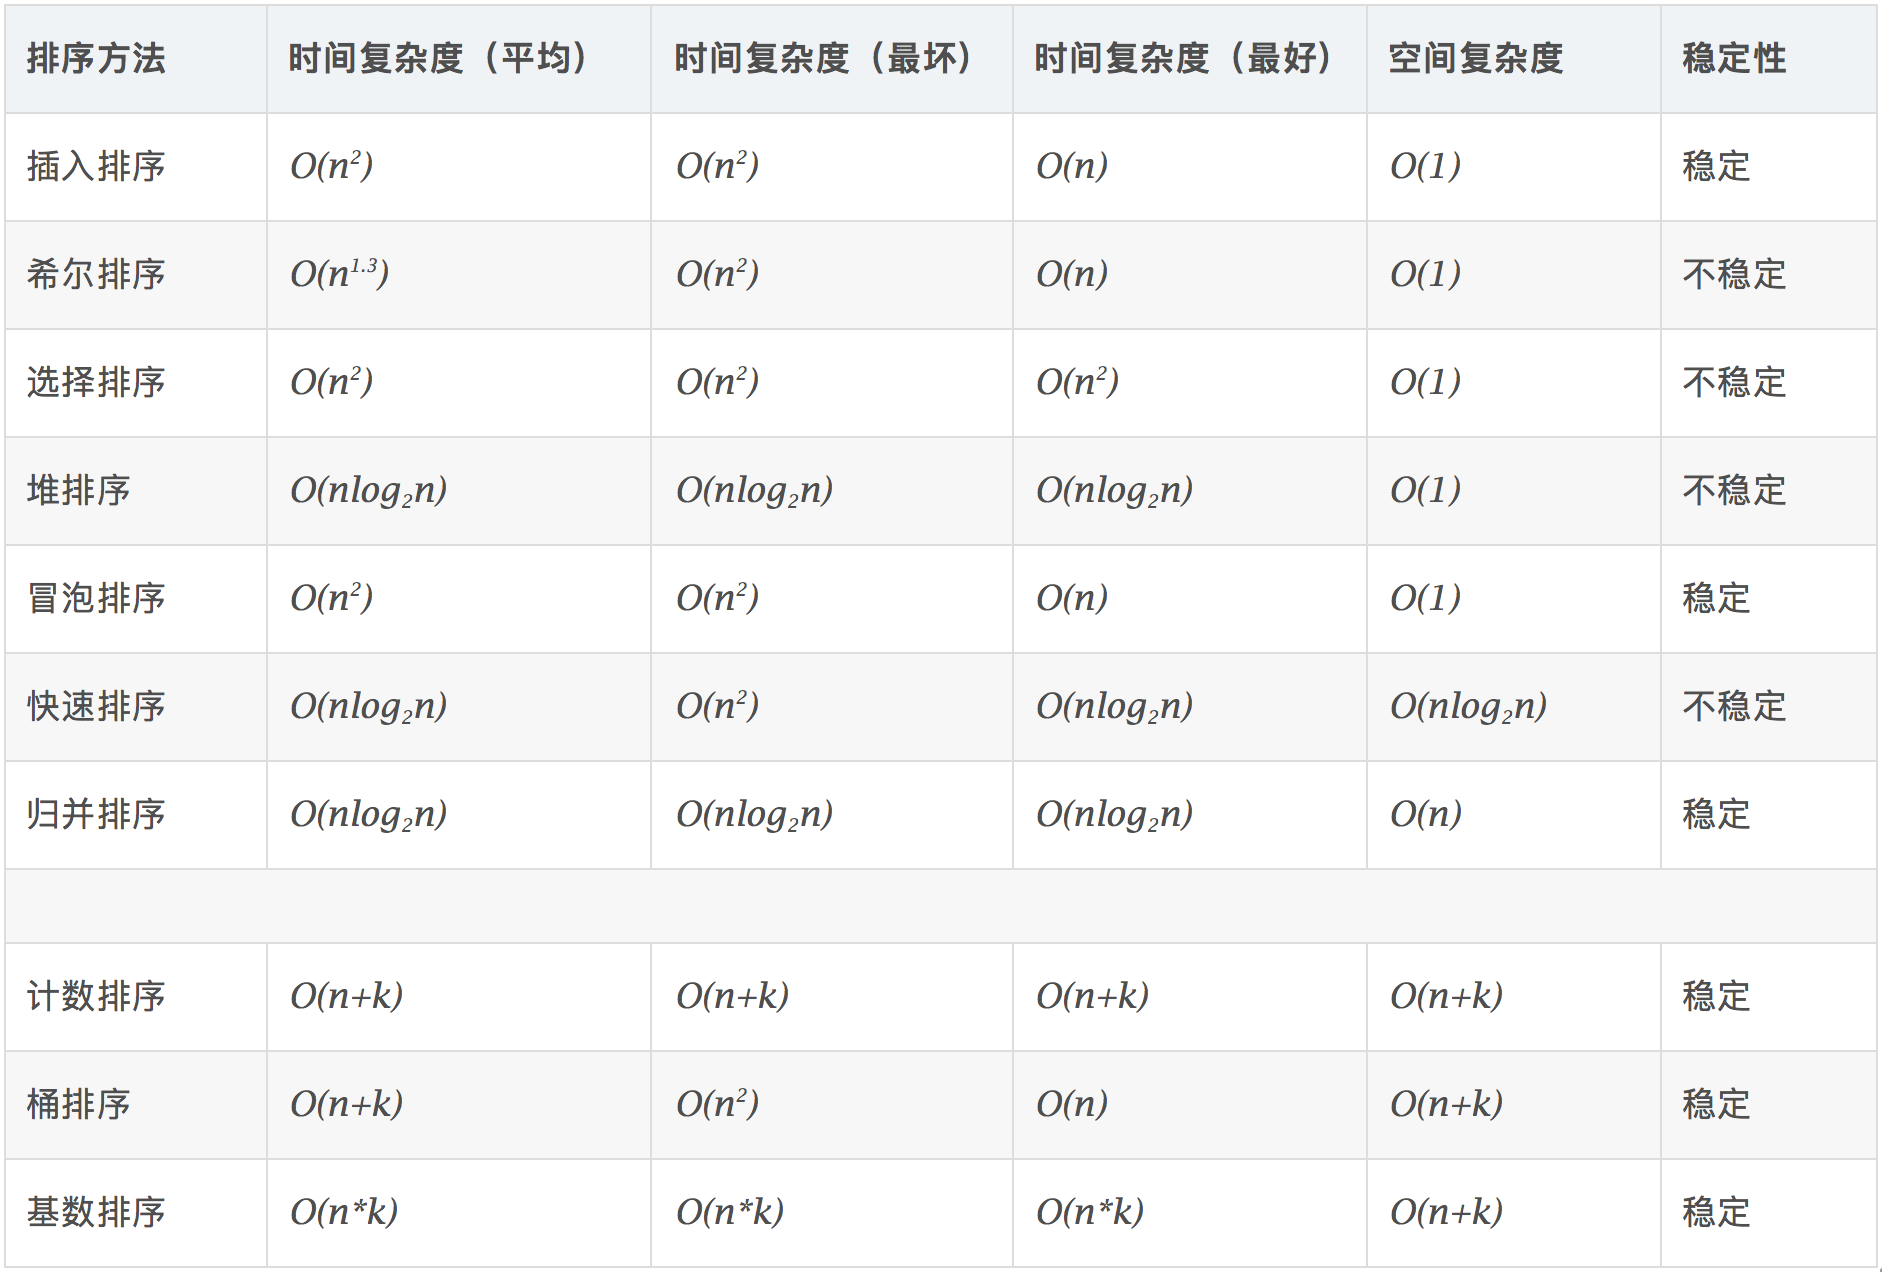

## 1.冒泡排序

时间复杂度

最好 O(n)

最坏 O(n^2)

平均


空间复杂度 O(n)

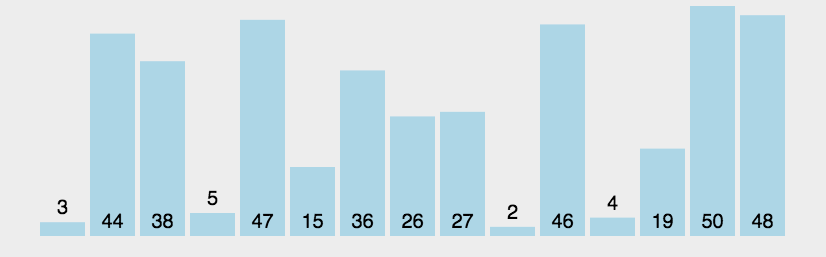

In [39]:
def bubble_sort(head):
    """
    bubble sort link list version.
    
    """
    i_node = head
    j_node = None
    # 第一层驱动循环，什么都不做
    while i_node:
        j_node = head
        # 第二层比较循环，和数组相比不能定位尾部坐标
        while j_node.next:
            if j_node.data > j_node.next.data:
                swap(j_node, j_node.next)
            j_node = j_node.next
        i_node = i_node.next   

In [40]:
link_list = LinkList()
for i in range(5, 1, -1):
    node = LinkNode(i)
    link_list.add_node(node)
link_list.show()
bubble_sort(link_list.head)
link_list.show()

5->4->3->2
2->3->4->5


# 2.选择排序

时间复杂度

最好 O(n)

最坏 O(n^2)

平均


空间复杂度 O(n)

ACTION

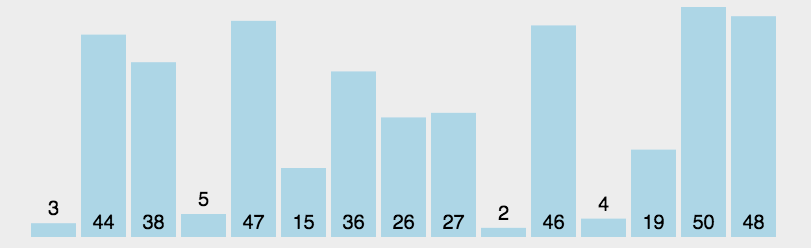

In [32]:
def choose_sort(head):
    """
    choose sort link list version.
    
    """
    
    i_node = head
    j_node = None
    min_node = None
    
    # 外层驱动节点
    while i_node:
        min_node = i_node
        j_node = i_node.next
        while j_node:
            if min_node.data > j_node.data:
                min_node = j_node
            j_node = j_node.next
        swap(min_node, i_node)
        i_node = i_node.next


In [33]:
link_list = LinkList()
for i in range(5, 1, -1):
    node = LinkNode(i)
    link_list.add_node(node)
link_list.show()
choose_sort(link_list.head)
link_list.show()

5->4->3->2
2->3->4->5


# 5.归并排序

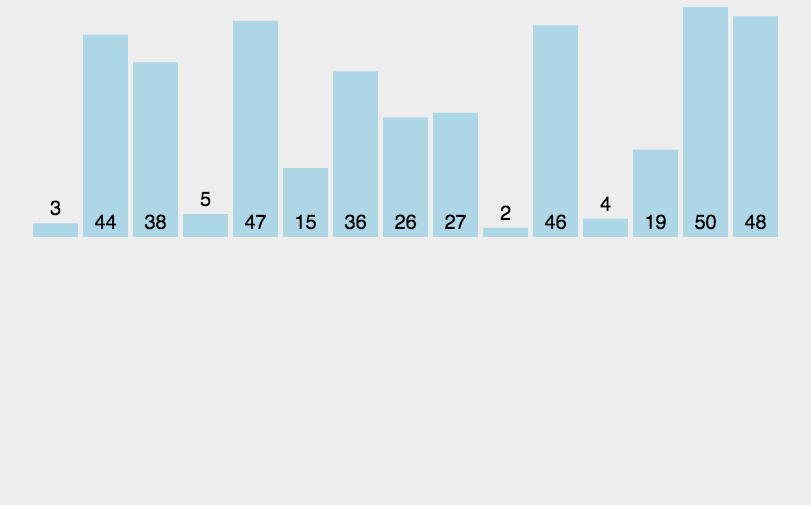

In [66]:
def merge(left, right):
    
    # 哑节点
    head = LinkNode(-1)
    tmp = head
    
    while left and right:
        
        if left.data < right.data:
            tmp.next = left
            # current point move 1 step
            tmp = tmp.next
            # left link point move 1 step
            left = left.next
        else:
            tmp.next = right
            # current point move 1 step
            tmp = tmp.next
            # right link point move 1 step
            right = right.next 
    
    # left节点有剩余
    if left:
        tmp.next = left
    
    # right节点有剩余
    if right:
        tmp.next = right
        
        
    return head.next

def merge_sort(head):
    
    if not head or not head.next:
        return head
    
    p_slow = head
    p_fast = head
    
    # 快慢指针搜索中心位置
    while p_fast.next and p_fast.next.next:
        p_fast = p_fast.next.next
        p_slow = p_slow.next
    
    mid = p_slow.next
    p_slow.next = None
    
    left_head = merge_sort(head)
    right_head = merge_sort(mid)
    
    return merge(left_head, right_head)

In [68]:
link_list = LinkList()
for i in range(5, 0, -1):
    node = LinkNode(i)
    link_list.add_node(node)
show(link_list.head)
merged_head = merge_sort(link_list.head)
show(merged_head)

5->4->3->2->1
1->2->3->4->5


# 6.快速排序

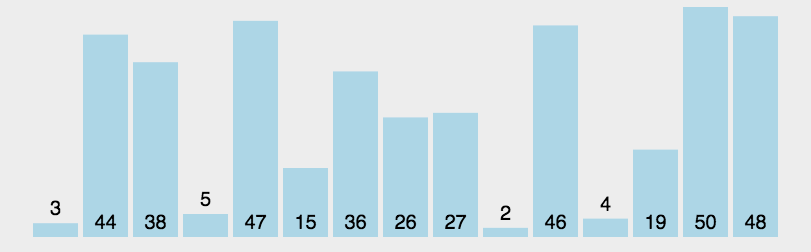

In [65]:
def quick_sort(array, low, high):
    
    if low < high:
        pivot_i = partition(array, low, high)
        quick_sort(array, low, pivot_i - 1)
        quick_sort(array, pivot_i + 1, high)
    return array

def partition(array, low, high):
    
    i = low
    j = high
    pivot = i
    while i < j:
        print i, j
        # find first less than pivot
        while i < j and array[i] <= array[pivot]:
            i += 1
        array[j] = array[j]
        # find first great than pivot
        while i < j and array[j] >= array[pivot]:
            j -= 1
        array[i] = array[j]
    array[pivot], array[i] = array[i], array[pivot]
    return i
array = [100, 2, 10 ,3, 5, 4, 3, 45] # 排序数组
print "origin array is %s" % (array)
print "-------------- cost time  ---------------"
%time quick_sort(array, 0, len(array)-1)
print "-----------------------------------------"
print "after sorted array is %s" % (array)  

origin array is [100, 2, 10, 3, 5, 4, 3, 45]
-------------- cost time  ---------------
0 7
0 6
0 5
0 1
3 5
CPU times: user 606 µs, sys: 600 µs, total: 1.21 ms
Wall time: 625 µs
-----------------------------------------
after sorted array is [2, 10, 3, 5, 3, 4, 45, 100]
